<strong> Code using asyncio and aiohttp <strong>

In [29]:
#example of use aiohttp for scraping
import time
import asyncio
import aiohttp
from aiohttp import ClientSession
from bs4 import BeautifulSoup
# import below is just for asyncio working properly in jupyter
import nest_asyncio
nest_asyncio.apply()

data = []
urls = ['https://norbaeocystin.github.io/']

headers = {'User-Agent': 'Mozilla/4.0 (compatible; MSIE 9.0; Windows NT 6.1)'}

#experiment with semaphore
#sem = asyncio.Semaphore(10)
#async with sem:

async def get_data(session, url):
    '''
    will get response from website and apply BeautifulSoup on it
    '''
    async with session.get(url, headers = headers) as response:
        response = await response.read()
        string_response = response.decode()
        soup = BeautifulSoup(string_response)
        data.append(soup.text)
 
 
async def apply_get_data(loop, urls):
    '''
    apply on list of urls
    '''
    async with aiohttp.ClientSession(loop=loop) as session:
        tasks = [get_data(session, url) for url in urls]
        await asyncio.gather(*tasks)
        
async def apply_get_data_with_semaphore(loop, urls, sem):
    '''
    apply on list of urls
    with Semaphore 
    '''
    semaphore = asyncio.Semaphore(sem)
    async with semaphore:
        async with aiohttp.ClientSession(loop=loop) as session:
            tasks = [get_data(session, url) for url in urls]
            await asyncio.gather(*tasks)

def get_time_asyncio(value):
    '''
    will multiply list of urls by value and run asyncio with aiohttp requests
    return time how long it takes
    '''
    t = time.time()
    loop = asyncio.get_event_loop()
    loop.run_until_complete(apply_get_data(loop, urls * value))
    return time.time() - t

def get_time_asyncio_with_semaphore(value, sem):
    '''
    will multiply list of urls by value and run asyncio with aiohttp requests
    return time how long it takes
    '''
    t = time.time()
    loop = asyncio.get_event_loop()
    loop.run_until_complete(apply_get_data_with_semaphore(loop, urls * value, sem))
    return time.time() - t

<strong>Code using concurrent.futures and requests library</strong>

In [11]:
from concurrent.futures import ThreadPoolExecutor
import requests
from bs4 import BeautifulSoup
import time

data = []
urls = ['https://norbaeocystin.github.io/']

headers = {'User-Agent': 'Mozilla/4.0 (compatible; MSIE 9.0; Windows NT 6.1)'}

def get_data_threads(url):
    r = requests.get(url, headers = headers)
    soup = BeautifulSoup(r.text)
    data.append(soup.text)

def get_time_threads(value):
    '''
    will multiply list of urls by value and run scraping with number of threads = value
    return time how long it takes
    '''
    t = time.time()
    with ThreadPoolExecutor(max_workers = value) as executor:
        executor.map(get_data_threads,urls * value)
    return time.time() - t

<strong> Running asyncio scraping from 1 to 301 urls in intervals 5<strong>

In [22]:
asyncio_x = list(range(1,301,5))
asyncio_y = []
for item in asyncio_x:
    t = get_time_asyncio(item)
    asyncio_y.append(t)

<strong> Running scraping on threads from 1 to 301 urls in intervals 5<strong>

In [12]:
threads_x = list(range(1,301,5))
threads_y = []
for item in threads_x:
    t = get_time_threads(item)
    threads_y.append(t)

<strong>Vizualization with matplotlib</strong>

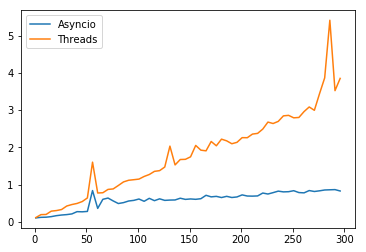

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(asyncio_x, asyncio_y, label = 'Asyncio')
ax.plot(threads_x, threads_y, label = 'Threads')
ax.legend()